In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
os.getcwd()

avengers = pd.read_csv("avengers.csv")
avengers

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
5,http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,NaN,Sep-63,1963,52,Honorary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,http://marvel.wikia.com/Steven_Rogers_(Earth-616),Steven Rogers,3458,YES,MALE,NaN,Mar-64,1964,51,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies at the end of Civil War. Later comes back.
7,http://marvel.wikia.com/Clint_Barton_(Earth-616),Clinton Francis Barton,1456,YES,MALE,NaN,May-65,1965,50,Full,...,YES,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,Dies in exploding Kree ship in Averngers Vol. ...
8,http://marvel.wikia.com/Pietro_Maximoff_(Earth...,Pietro Maximoff,769,YES,MALE,NaN,May-65,1965,50,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in House of M Vol 1 Issue 7. Later comes ...
9,http://marvel.wikia.com/Wanda_Maximoff_(Earth-...,Wanda Maximoff,1214,YES,FEMALE,NaN,May-65,1965,50,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Uncanny_Avengers_Vol_1_14. Later comes...


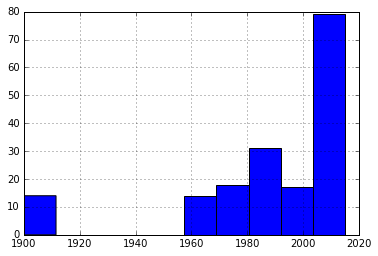

In [8]:
avengers['Year'].hist()

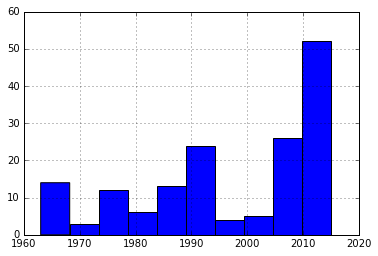

In [16]:
#We only want to keep the Avengers who were introduced after 1960. 
#Filter out all Avengers introduced before 1960 and store only the ones added in 1960 or later in true_avengers.
years = avengers['Year'] > 1960
true_avengers = avengers[years == True]
true_avengers['Year'].hist()

In [25]:
columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']

def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
   
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == "NO":
            continue
        elif death == "YES":
            num_deaths += 1
    return num_deaths

true_avengers['Death'] = true_avengers.apply(lambda row: clean_deaths(row), axis = 1)
             
true_avengers[['Death1', 'Death2', 'Death3', 'Death4', 'Death5','Death']]

/Users/ericlee/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Death1,Death2,Death3,Death4,Death5,Death
0,YES,NaN,NaN,NaN,NaN,1
1,YES,NaN,NaN,NaN,NaN,1
2,YES,NaN,NaN,NaN,NaN,1
3,YES,NaN,NaN,NaN,NaN,1
4,YES,YES,NaN,NaN,NaN,2
5,NO,NaN,NaN,NaN,NaN,0
6,YES,NaN,NaN,NaN,NaN,1
7,YES,YES,NaN,NaN,NaN,2
8,YES,NaN,NaN,NaN,NaN,1
9,YES,NaN,NaN,NaN,NaN,1


In [31]:
#Want to know if the Years since joining field accurately reflects the Year column. 
#If an Avenger was introduced in Year 1960, is the Years since joining value for that Avenger 55?
#Calculate the number of rows where Years since joining is accurate. 
#This challenge was created in 2015, so use that as the reference year. 
#We want to know for how many rows Years since joining was correctly calculated as Year value subtracted from 2015.

correct_years_since = true_avengers[true_avengers["Years since joining"]==(2015 - true_avengers["Year"])]
number_correct = len(correct_years_since)
number_correct

159